In [1]:
import os
os.chdir('/cluster/home/bdayan/girgs/benji_src/notebooks/')

import sys
sys.path.append('../')
sys.path.append('../../nemo-eva/src/')

import os
os.getcwd()

import feature_extractor
import networkit as nk

import do_feature_extract
import grakel

import matplotlib.pyplot as plt
import seaborn as sns


/cluster/scratch/bdayan/GIRG_data/socfb-Berkeley13.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-American75.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-UConn.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-MSU24.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Brandeis99.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Virginia63.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Duke14.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Indiana69.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Swarthmore42.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Simmons81.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Georgetown15.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Reed98.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-UC64.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Bowdoin47.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-UChicago30.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Middlebury45.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-MIT.SpaceOne
/cluster

In [2]:
from benji_girgs import graph_kernels, utils

In [48]:
df_mini = graph_kernels.df_mini
df_mini.loc[df_mini.Model=='1d-copyweight-cube-girg'].sort_values('Nodes')

,Graph,Model,Type,Nodes,Edges,Info,alpha
0,socfb-Caltech36,1d-copyweight-cube-girg,socfb,756,16766,"{'tau': '7.3017225936374555', 'alpha': '1.2171...",1.217193
1,socfb-Reed98,1d-copyweight-cube-girg,socfb,955,18329,"{'tau': '4.381732472502371', 'alpha': '1.07671...",1.076716
4,socfb-Haverford76,1d-copyweight-cube-girg,socfb,1440,57770,"{'tau': '6.5461700448727616', 'alpha': '1.0592...",1.059252
3,socfb-Simmons81,1d-copyweight-cube-girg,socfb,1497,33125,"{'tau': '4.739342146243066', 'alpha': '1.16300...",1.163002
6,socfb-Swarthmore42,1d-copyweight-cube-girg,socfb,1657,61392,"{'tau': '5.598783007439967', 'alpha': '1.04234...",1.042345
...,...,...,...,...,...,...,...
162,socfb-MSU24,1d-copyweight-cube-girg,socfb,32345,1115806,"{'tau': '5.112979295133962', 'alpha': '1.02195...",1.021956
167,socfb-UF,1d-copyweight-cube-girg,socfb,35095,1454892,"{'tau': '4.918454781144023', 'alpha': '1.05073...",1.050731
165,socfb-UF21,1d-copyweight-cube-girg,socfb,35101,1448482,"{'tau': '4.918454781144023', 'alpha': '1.04652...",1.046521
117,socfb-Texas84,1d-copyweight-cube-girg,socfb,36354,1576966,"{'tau': '4.774843344808111', 'alpha': '1.01010...",1.010101


In [53]:
df_mini.loc[df_mini.Model=='1d-copyweight-cube-girg'].sort_values('Nodes').head(40)

,Graph,Model,Type,Nodes,Edges,Info,alpha
0,socfb-Caltech36,1d-copyweight-cube-girg,socfb,756,16766,"{'tau': '7.3017225936374555', 'alpha': '1.2171...",1.217193
1,socfb-Reed98,1d-copyweight-cube-girg,socfb,955,18329,"{'tau': '4.381732472502371', 'alpha': '1.07671...",1.076716
4,socfb-Haverford76,1d-copyweight-cube-girg,socfb,1440,57770,"{'tau': '6.5461700448727616', 'alpha': '1.0592...",1.059252
3,socfb-Simmons81,1d-copyweight-cube-girg,socfb,1497,33125,"{'tau': '4.739342146243066', 'alpha': '1.16300...",1.163002
6,socfb-Swarthmore42,1d-copyweight-cube-girg,socfb,1657,61392,"{'tau': '5.598783007439967', 'alpha': '1.04234...",1.042345
10,socfb-Amherst41,1d-copyweight-cube-girg,socfb,2228,89961,"{'tau': '5.642546890477902', 'alpha': '1.11343...",1.113431
9,socfb-Bowdoin47,1d-copyweight-cube-girg,socfb,2243,85416,"{'tau': '5.797840767000196', 'alpha': '1.09476...",1.094766
11,socfb-Hamilton46,1d-copyweight-cube-girg,socfb,2304,97565,"{'tau': '4.6307554786922545', 'alpha': '1.1040...",1.104019
16,socfb-Trinity100,1d-copyweight-cube-girg,socfb,2605,112414,"{'tau': '5.834416221456861', 'alpha': '1.11343...",1.113431
14,socfb-USFCA72,1d-copyweight-cube-girg,socfb,2656,64743,"{'tau': '4.132213912548606', 'alpha': '1.08117...",1.081172


In [14]:
import importlib
importlib.reload(graph_kernels)

<module 'benji_girgs.graph_kernels' from '../benji_girgs/graph_kernels.py'>

In [31]:
def do_socfb_synthetic(name='socfb-Caltech36', d=1, n_per=6):
    gd = list(filter(lambda x: x['Name'] == name, do_feature_extract.graph_dicts))[0]
    in_path = gd['FullPath']

    g = nk.readGraph(in_path, nk.Format.EdgeListSpaceOne)
    g = utils.get_largest_component(g)

    cl_mixin_prob=0.0
    g_synthetic = graph_kernels.get_fit_cube_girg(g, d=d, name=name, cl_mixin_prob=cl_mixin_prob)

    print(g.numberOfNodes())
    print(utils.LCC(g))
    print(g_synthetic.numberOfNodes())
    print(utils.LCC(g_synthetic))

    data = graph_kernels.run_experiment(g=g_synthetic, name=name, n_per=n_per, kernel=grakel.WeisfeilerLehman(n_iter=5, normalize=True), node_labelling_func= lambda g: graph_kernels.graph_to_labels(g, num_colors=None), plot_type=None)

    print(data.to_csv())
    plt.figure()
    sns.boxplot(data=data)
    plt.title(f'd={d} copyweight cube of {name}: {g.numberOfNodes()} Nodes')
    plt.xlabel('Graph Generative Model')
    plt.ylabel('1 - WL-kernel')
    return data

In [33]:
outs = []

../benji_girgs/generation.py:136: RuntimeWarning: divide by zero encountered in divide
  p_uv = np.divide(outer, dists**d)
../benji_girgs/generation.py:626: RuntimeWarning: divide by zero encountered in divide
  puv = np.stack([np.ones(original_edge_dists.shape), const_in * ((wu * wv / W) / original_edge_dists ** d) ** alpha]).min(axis=0)
../benji_girgs/generation.py:627: RuntimeWarning: divide by zero encountered in divide
  puv_cube = np.stack([np.ones(cube_edge_dists.shape), const_in * ((wu * wv / W) / cube_edge_dists ** d) ** alpha]).min(axis=0)


2613
0.2903246960045111
2613
0.2917293313543732
cl
0.7133596230893066
0.7110123185192441
0.712756987117865
0.714282167959432
0.7108529682105045
0.7031314960700602
0.7071499297859425
0.7018695495527653
0.7056906636409869
0.7057912421434865
0.7111914978983912
0.7105962444271432
0.7046156904575284
1
0.715733929862967
0.7111088369344867
0.7139105498841418
0.7190473016769267
0.7078817131434585
0.7118438673677686
0.7177140460785455
0.7092064131330627
0.716206918750162
0.7099504331080618
0.7113959196465113
0.715608115503276
0.717248216961632
2
0.7070691150212064
0.7042152143740951
0.7006491742833916
0.7025339800988946
0.7000886497612908
0.7096929032042412
0.7091099071019525
0.7127696492286776
0.714755092749947
0.7114317451209793
0.7050566778154849
0.7020911794086525
0.7013876757823303
3
0.7096603442974443
0.7024678124949717
0.7121425748000212
0.7020609927049105
0.7019408117740391
0.7155225387392781
0.7090000154293348
0.710933564252561
0.7021419112657615
0.7174335698123288
0.7092916811998365
0

../benji_girgs/generation.py:136: RuntimeWarning: divide by zero encountered in divide
  p_uv = np.divide(outer, dists**d)


2613
0.2903246960045111
2613
0.2868135587045255
cl
0.7005652733759192
0.7022526834111422
0.7064464499480413
0.7027291011851327
0.7033018441622996
0.7020260455193911
0.695969045726999
0.7067100353192708
0.6976986097420301
0.7104688342725082
0.6990141375359118
0.704085016886114
0.701303454996757
1
0.7054320564885117
0.7105854438176784
0.6968080520833184
0.7037536663676478
0.7001531600115392
0.7117646205638283
0.713353555626525
0.704032746149227
0.7017613921369049
0.705646295725587
0.7093860055330681
0.704149527382683
0.7084955580405884
2
0.7037558512054432
0.6951218285247258
0.7005392460609335
0.6973611752424647
0.7011432055147268
0.7015368768550997
0.695710021089757
0.7033415646033112
0.7017078262746589
0.7005095101531702
0.7027281558279795
0.7018532257018487
0.7123776765369592
3
0.70029063977548
0.6943038252352437
0.6962515345043974
0.7067754950971935
0.6939675338508826
0.701566789017778
0.687549944946876
0.7019437313332118
0.7048079301711186
0.7026710627359575
0.7004495319884565
0.695

../benji_girgs/generation.py:136: RuntimeWarning: divide by zero encountered in divide
  p_uv = np.divide(outer, dists**d)
../benji_girgs/generation.py:626: RuntimeWarning: divide by zero encountered in divide
  puv = np.stack([np.ones(original_edge_dists.shape), const_in * ((wu * wv / W) / original_edge_dists ** d) ** alpha]).min(axis=0)
../benji_girgs/generation.py:627: RuntimeWarning: divide by zero encountered in divide
  puv_cube = np.stack([np.ones(cube_edge_dists.shape), const_in * ((wu * wv / W) / cube_edge_dists ** d) ** alpha]).min(axis=0)


2613
0.2903246960045111
2613
0.29486229045666057
cl
0.7046720275215543
0.7046450034123872
0.7087896260512945
0.7082582941850598
0.7026781415575643
0.7155031857678332
0.7016784457370769
0.6995634514232756
0.7128427634016203
0.6974073071020952
0.7084125194119927
0.702958911275786
0.6997626411195385
1
0.7113848503904466
0.7043768648285736
0.7156599420150579
0.7109627320230251
0.700841456477975
0.7157280710909669
0.7049869273900717
0.7104718051502917
0.714830249630412
0.7165506418947776
0.7046135290182182
0.709020917220137
0.7088767051593994
2
0.7134208746616505
0.7046652042163355
0.6999112084065782
0.7044284726640199
0.7072877459763396
0.7110893010260739
0.7028034790360361
0.696991413239308
0.7068075670953329
0.7078233486415821
0.7017556683305507
0.7050443585367291
0.7055184406946444
3
0.7012535649947699
0.7044568420035685
0.6988599932370834
0.7053066710969387
0.7055793163158083
0.7069473441487681
0.7097467639489389
0.707583632841473
0.6996129615101008
0.7073380682121014
0.701673535899273

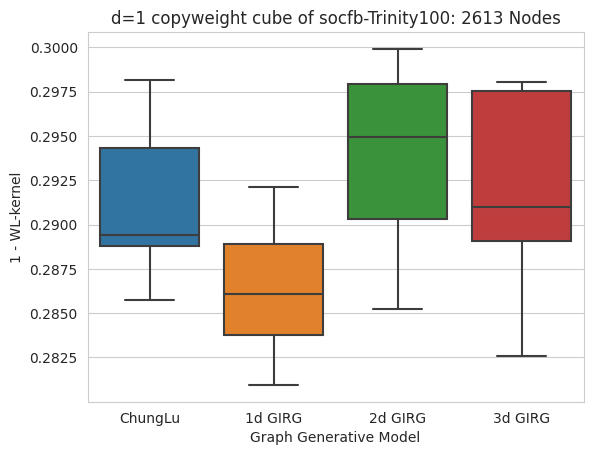

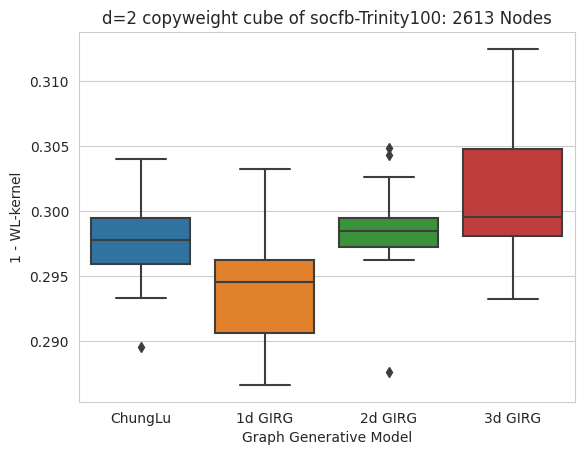

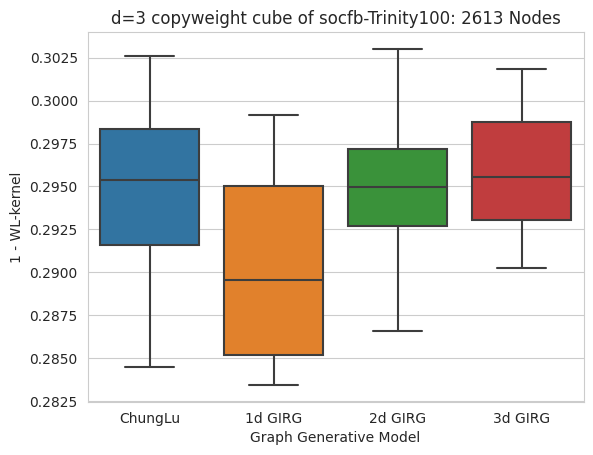

In [34]:
for d in [1,2,3]:
    outs.append(do_socfb_synthetic(name='socfb-Trinity100', d=d, n_per=13))

In [36]:
def do_socfb_synthetic2(name='socfb-Caltech36', d=1, n_per=6):
    gd = list(filter(lambda x: x['Name'] == name, do_feature_extract.graph_dicts))[0]
    in_path = gd['FullPath']

    g = nk.readGraph(in_path, nk.Format.EdgeListSpaceOne)
    g = utils.get_largest_component(g)

    cl_mixin_prob=0.0
    g_synthetic = graph_kernels.get_fit_cube_girg(g, d=d, name=name, cl_mixin_prob=cl_mixin_prob)

    print(g.numberOfNodes())
    print(utils.LCC(g))
    print(g_synthetic.numberOfNodes())
    print(utils.LCC(g_synthetic))

    data = graph_kernels.run_experiment(g=g_synthetic, name=name, n_per=n_per,
        kernel=grakel.kernels.RandomWalk(normalize=True, lamda=1e-5, kernel_type='geometric'),
        node_labelling_func=None, plot_type=None)

    print(data.to_csv())
    plt.figure()
    sns.boxplot(data=data)
    plt.title(f'd={d} copyweight cube of {name}: {g.numberOfNodes()} Nodes')
    plt.xlabel('Graph Generative Model')
    plt.ylabel('1 - WL-kernel')
    return data

../benji_girgs/generation.py:136: RuntimeWarning: divide by zero encountered in divide
  p_uv = np.divide(outer, dists**d)


2613
0.2903246960045111
2613
0.2875910088788818
cl
0.9999997796094444
0.9999992772373212
0.9999993782008892
1
0.9999707775887662
0.9999592287683016
0.9999807873044559
2
0.9999887695724317
0.9999722768449484
0.9999862168233732
3
0.9999823641567197
0.9999912008104147
0.9999302635973315
,ChungLu,1d GIRG,2d GIRG,3d GIRG
0,2.2039055558309428e-07,2.922241123382019e-05,1.1230427568342805e-05,1.7635843280294772e-05
1,7.227626788175456e-07,4.077123169843322e-05,2.772315505161771e-05,8.799189585295686e-06
2,6.217991107559939e-07,1.9212695544057468e-05,1.378317662681372e-05,6.973640266849657e-05



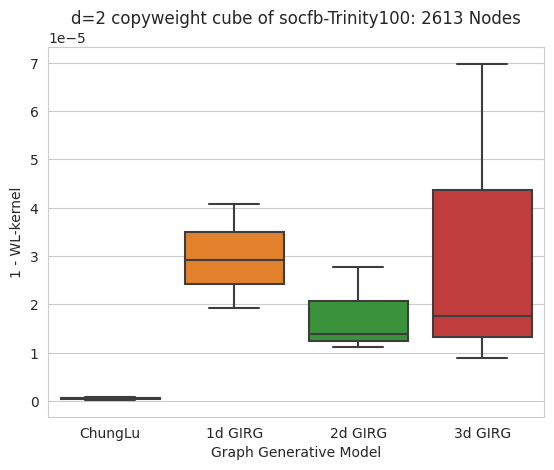

In [37]:
outs2 = []
outs2.append(do_socfb_synthetic2(name='socfb-Trinity100', d=2, n_per=3))

../benji_girgs/generation.py:136: RuntimeWarning: divide by zero encountered in divide
  p_uv = np.divide(outer, dists**d)
../benji_girgs/generation.py:626: RuntimeWarning: divide by zero encountered in divide
  puv = np.stack([np.ones(original_edge_dists.shape), const_in * ((wu * wv / W) / original_edge_dists ** d) ** alpha]).min(axis=0)
../benji_girgs/generation.py:627: RuntimeWarning: divide by zero encountered in divide
  puv_cube = np.stack([np.ones(cube_edge_dists.shape), const_in * ((wu * wv / W) / cube_edge_dists ** d) ** alpha]).min(axis=0)


2613
0.2903246960045111
2613
0.2937969607444234
cl
0.9999999070261708
0.9999971114987221
0.9999996998458862
0.9999989233216285
0.9999998296422344
0.9999995566614543
1
0.9999855612273842
0.9999886149552455
0.9999907031554914
0.9999896558161198
0.9999787273514522
0.9999888286145022
2
0.9999248267457171
0.999986232161123
0.9999784221503484
0.9999886780013918
0.9999756022250935
0.9999599224629819
3
0.9999655188146034
0.999809335219894
0.9999235666889233
0.9999207245227744
0.9998641720576306
0.9999740492508791
,ChungLu,1d GIRG,2d GIRG,3d GIRG
0,9.297382919104535e-08,1.4438772615754658e-05,7.517325428285648e-05,3.44811853966176e-05
1,2.888501277942268e-06,1.13850447545083e-05,1.3767838876965754e-05,0.00019066478010598686
2,3.0015411378592205e-07,9.29684450856616e-06,2.1577849651621683e-05,7.64333110766513e-05
3,1.0766783714588612e-06,1.0344183880239832e-05,1.1321998608204709e-05,7.927547722563766e-05
4,1.7035776556095783e-07,2.1272648547787654e-05,2.439777490648165e-05,0.00013582794236943752

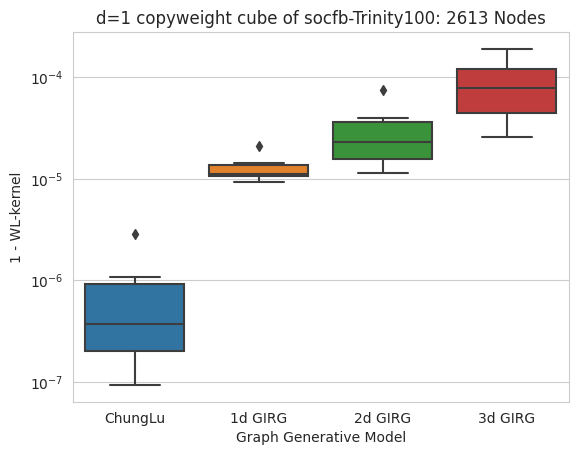

In [39]:
outs3 = []
outs3.append(do_socfb_synthetic2(name='socfb-Trinity100', d=1, n_per=6))
plt.yscale('log')

../benji_girgs/generation.py:136: RuntimeWarning: divide by zero encountered in divide
  p_uv = np.divide(outer, dists**d)


2613
0.2903246960045111
2613
0.28887778117799334
cl
0.9999991436295319
0.9999986690115087
0.9999993632593958
0.9999992283543729
0.999999692848596
0.9999997190490825
1
0.999931291937396
0.9999417391713202
0.9999591169495311
0.9999589459320557
0.9999667792755286
0.9999637292642283
2
0.999970672238871
0.9999740498066102
0.9999798659904364
0.9999772560329693
0.9999496586477058
0.9999552277314802
3
0.999995097292963
0.9999975393916125
0.9999206734448238
0.9999957506849192
0.9999820768057952
0.9999892898356472
,ChungLu,1d GIRG,2d GIRG,3d GIRG
0,8.563704680941697e-07,6.870806260395046e-05,2.9327761128961072e-05,4.902707037013343e-06
1,1.3309884913104142e-06,5.826082867976812e-05,2.595019338980098e-05,2.4606083874889606e-06
2,6.367406042429025e-07,4.0883050468898396e-05,2.0134009563577138e-05,7.932655517617349e-05
3,7.71645627062334e-07,4.1054067944301664e-05,2.274396703072501e-05,4.249315080806504e-06
4,3.0715140397763463e-07,3.3220724471427765e-05,5.034135229420311e-05,1.7923194204794157e-05

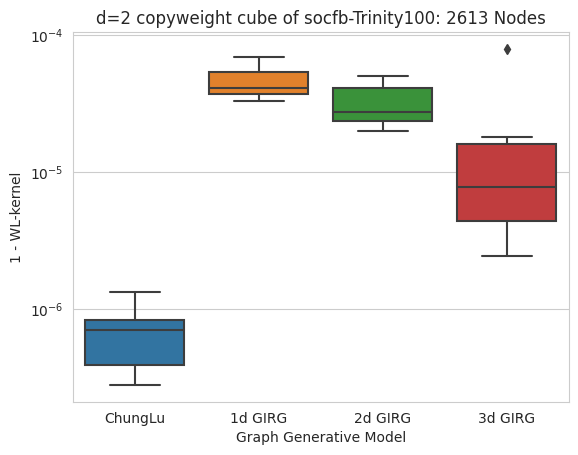

In [40]:
outs3.append(do_socfb_synthetic2(name='socfb-Trinity100', d=2, n_per=6))
plt.yscale('log')

../benji_girgs/generation.py:136: RuntimeWarning: divide by zero encountered in divide
  p_uv = np.divide(outer, dists**d)
../benji_girgs/generation.py:626: RuntimeWarning: divide by zero encountered in divide
  puv = np.stack([np.ones(original_edge_dists.shape), const_in * ((wu * wv / W) / original_edge_dists ** d) ** alpha]).min(axis=0)
../benji_girgs/generation.py:627: RuntimeWarning: divide by zero encountered in divide
  puv_cube = np.stack([np.ones(cube_edge_dists.shape), const_in * ((wu * wv / W) / cube_edge_dists ** d) ** alpha]).min(axis=0)


2613
0.2903246960045111
2613
0.29120044701558434
cl
0.9999987108061622
0.9999988365734404
0.9999992114682635
0.9999989184022845
0.9999991827055124
0.9999985870649177
1
0.9999484154254512
0.999966349346838
0.9999633257896435
0.9999682500963339
0.9999517165149784
0.9999525150262673
2
0.9999707771807765
0.9999712207389105
0.9999764002090464
0.9999770962064055
0.9999733453354757
0.9999744805282846
3
0.9999887580379586
0.9999803219336886
0.9999825728151582
0.9999832604930788
0.9999814300487051
0.9999128529052911
,ChungLu,1d GIRG,2d GIRG,3d GIRG
0,1.2891938377945777e-06,5.158457454879084e-05,2.922281922346226e-05,1.1241962041386167e-05
1,1.1634265596471849e-06,3.365065316196514e-05,2.877926108946216e-05,1.967806631142377e-05
2,7.885317364619837e-07,3.6674210356468784e-05,2.359979095356568e-05,1.7427184841767307e-05
3,1.0815977155020917e-06,3.1749903666056234e-05,2.2903793594486466e-05,1.6739506921159553e-05
4,8.172944876427835e-07,4.828348502161628e-05,2.665466452433929e-05,1.856995129490002

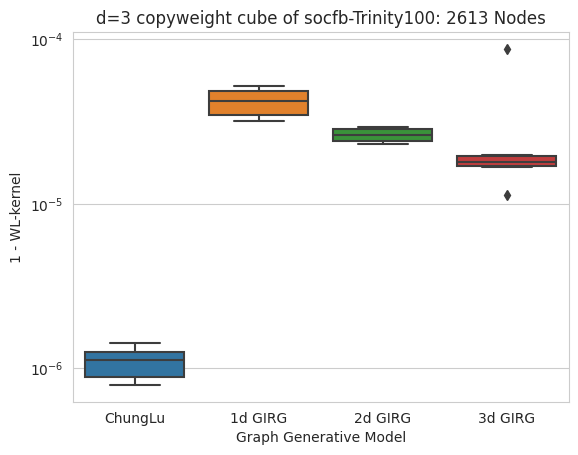

In [41]:
outs3.append(do_socfb_synthetic2(name='socfb-Trinity100', d=3, n_per=6))
plt.yscale('log')

../benji_girgs/generation.py:136: RuntimeWarning: divide by zero encountered in divide
  p_uv = np.divide(outer, dists**d)
../benji_girgs/generation.py:626: RuntimeWarning: divide by zero encountered in divide
  puv = np.stack([np.ones(original_edge_dists.shape), const_in * ((wu * wv / W) / original_edge_dists ** d) ** alpha]).min(axis=0)
../benji_girgs/generation.py:627: RuntimeWarning: divide by zero encountered in divide
  puv_cube = np.stack([np.ones(cube_edge_dists.shape), const_in * ((wu * wv / W) / cube_edge_dists ** d) ** alpha]).min(axis=0)


3887
0.2628451661269474
3887
0.26353673495816254
cl
0.9999994259856099
0.9999992326417694
0.999999880355489
0.9999992947404496
0.9999998028377823
0.9999996225298008
1
0.9999792246865127
0.9999713151672419
0.9999755729883398
0.9999749311465642
0.9999721426932995
0.9999756242359811
2
0.9999321981379157
0.9999317096812677
0.9999584847968224
0.9999581158104431
0.9999354031170412
0.9999427084897321
3
0.9999694817912094
0.9999534160917353
0.9999744667880925
0.9999636612500288
0.9999832206532779
0.9999843971977248
,ChungLu,1d GIRG,2d GIRG,3d GIRG
0,5.740143901311612e-07,2.077531348732009e-05,6.780186208432681e-05,3.051820879063083e-05
1,7.673582306244597e-07,2.8684832758085754e-05,6.82903187323447e-05,4.6583908264730134e-05
2,1.1964451096524442e-07,2.4427011660166364e-05,4.151520317763335e-05,2.5533211907458053e-05
3,7.052595504264403e-07,2.5068853435783467e-05,4.188418955686224e-05,3.6338749971220885e-05
4,1.9716221766330477e-07,2.7857306700518336e-05,6.459688295878951e-05,1.677934672206227e

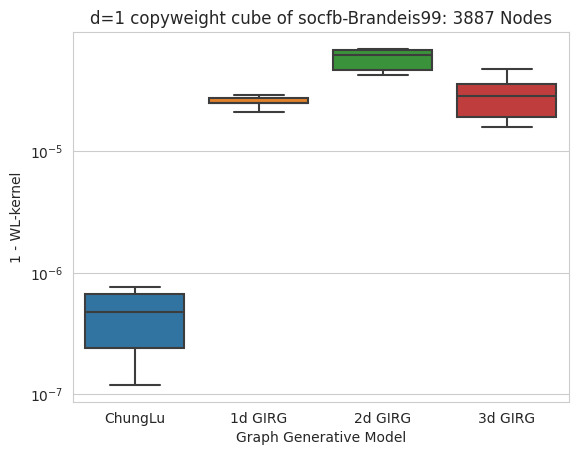

In [43]:
outs4 = []
outs4.append(do_socfb_synthetic2(name='socfb-Brandeis99', d=1, n_per=6))
plt.yscale('log')

In [ ]:
outs4.append(do_socfb_synthetic2(name='socfb-Brandeis99', d=2, n_per=6))
plt.yscale('log')

../benji_girgs/generation.py:136: RuntimeWarning: divide by zero encountered in divide
  p_uv = np.divide(outer, dists**d)


3887
0.2628451661269474
3887
0.26339228315929364
cl
0.9999991504648547
0.9999996950029739
0.9999986910285743
0.9999996999452286
0.9999997922975484
0.9999998227103023
1
0.9999800655418195


In [ ]:
outs4.append(do_socfb_synthetic2(name='socfb-Brandeis99', d=3, n_per=6))
plt.yscale('log')

In [ ]:
outs5 = []
outs5.append(do_socfb_synthetic2(name='socfb-MIT', d=1, n_per=6))
plt.yscale('log')

KeyboardInterrupt: 

In [ ]:
outs5.append(do_socfb_synthetic2(name='socfb-MIT', d=2, n_per=6))
plt.yscale('log')

In [ ]:
outs5.append(do_socfb_synthetic2(name='socfb-MIT', d=3, n_per=6))
plt.yscale('log')

../benji_girgs/generation.py:136: RuntimeWarning: divide by zero encountered in divide
  p_uv = np.divide(outer, dists**d)


2613
0.2903246960045111
2613
0.2874466978524578
cl
0.7034842332911757
0.6990999342798189
0.7051828094447398
0.7067602756125778
0.712874361585732
0.701295205530944
1
0.7050018130437856
0.7113506363021207
0.7045237744554677
0.7102354016463974
0.7074362842184748
0.7082377978583819
2
0.7040245117537772
0.7016011125421755
0.6988444415839016
0.7000077140901312
0.6988138999457932
0.7036306917147233
3
0.7029038923504869
0.7024191873210291
0.7012963077550228
0.6978684963001512
0.7044690239810726
0.7033868761225088
,ChungLu,1d GIRG,2d GIRG,3d GIRG
0,0.2965157667088243,0.2949981869562144,0.2959754882462228,0.2970961076495131
1,0.30090006572018113,0.2886493636978793,0.2983988874578245,0.29758081267897085
2,0.29481719055526023,0.29547622554453234,0.3011555584160984,0.29870369224497717
3,0.2932397243874222,0.2897645983536026,0.2999922859098688,0.30213150369984876
4,0.28712563841426797,0.2925637157815252,0.30118610005420676,0.2955309760189274
5,0.29870479446905596,0.2917622021416181,0.296369308285276

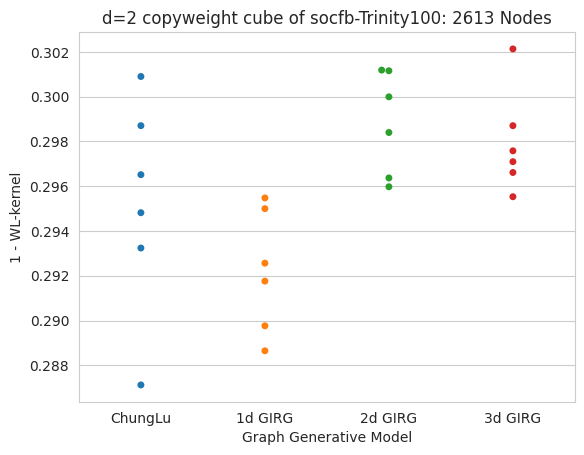

In [25]:
outs.append(do_socfb_synthetic(name='socfb-Trinity100', d=2))

In [26]:
outs.append(do_socfb_synthetic(name='socfb-Trinity100', d=3))

../benji_girgs/generation.py:136: RuntimeWarning: divide by zero encountered in divide
  p_uv = np.divide(outer, dists**d)


2613
0.2903246960045111
2613
0.29493550609492075
cl
0.7060937201450463
0.693402769944439
0.6959453140074461
0.7016433037388025
0.6961974350267248
0.6966457780814846
1
0.7024448485561573
0.7068960943395013
0.7022832881183221
0.7000370427923188
0.6986104431929809
0.7034206233253328
2
0.7048870234376793
0.6955199816005176
0.6999131414229168
0.6970391529972244
0.7045690566168271
0.7012484856374136
3
0.6896885720355046
0.703174436632639
0.6945240471844744
0.6928361330861549
0.6979113679888006


KeyboardInterrupt: 

In [ ]:
outs2 = []
for d in [1, 2, 3]:
    outs2.append(do_socfb_synthetic(name='socfb-JohnsHopkins55', d=d))

762
0.4091173048334612
762
0.40365380208884805
cl
0.5645945290338418
1
0.5584155580263892
2
0.5508535436479702
3
0.5734735118364263
,ChungLu,1d GIRG,2d GIRG,3d GIRG
0,0.4354054709661582,0.4415844419736108,0.44914645635202977,0.42652648816357375



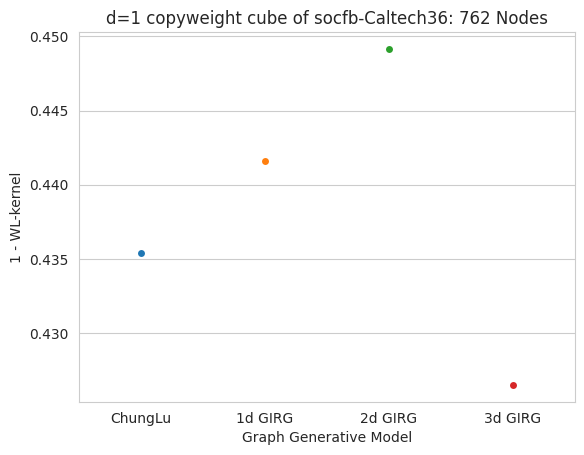

In [18]:
data = do_socfb_synthetic(name='socfb-Caltech36', d=2)

In [17]:
data = do_socfb_synthetic(name='socfb-Pepperdine86', d=2)

../benji_girgs/generation.py:136: RuntimeWarning: divide by zero encountered in divide
  p_uv = np.divide(outer, dists**d)
../benji_girgs/generation.py:626: RuntimeWarning: divide by zero encountered in divide
  puv = np.stack([np.ones(original_edge_dists.shape), const_in * ((wu * wv / W) / original_edge_dists ** d) ** alpha]).min(axis=0)
../benji_girgs/generation.py:627: RuntimeWarning: divide by zero encountered in divide
  puv_cube = np.stack([np.ones(cube_edge_dists.shape), const_in * ((wu * wv / W) / cube_edge_dists ** d) ** alpha]).min(axis=0)


3440
0.27697571394183823
3440
0.2827021673336341


KeyboardInterrupt: 

In [10]:
os.listdir('/cluster/scratch/bdayan/GIRG_data/')

['socfb-Duke14.SpaceOne',
 'socfb-Swarthmore42.SpaceOne',
 'socfb-Simmons81.SpaceOne',
 'socfb-Reed98.SpaceOne',
 'socfb-Bowdoin47.SpaceOne',
 'socfb-UChicago30.SpaceOne',
 'socfb-MIT.SpaceOne',
 'socfb-WashU32.SpaceOne',
 'socfb-Stanford3.SpaceOne',
 'socfb-JohnsHopkins55.SpaceOne',
 'socfb-Rice31.SpaceOne',
 'socfb-GWU54.SpaceOne',
 'socfb-Vermont70.SpaceOne',
 'socfb-Williams40.SpaceOne',
 'socfb-UCSB37.SpaceOne',
 'socfb-Vanderbilt48.SpaceOne',
 'socfb-CMU.SpaceOne',
 'socfb-USFCA72.SpaceOne',
 'socfb-Santa74.SpaceOne',
 'socfb-Maine59.SpaceOne',
 'socfb-Caltech36.SpaceOne',
 'socfb-Mississippi66.SpaceOne',
 'socfb-Bucknell39.SpaceOne',
 'socfb-Trinity100.SpaceOne',
 'socfb-UCSC68.SpaceOne',
 'socfb-Smith60.SpaceOne',
 'socfb-Syracuse56.SpaceOne',
 'socfb-Amherst41.SpaceOne',
 'socfb-Vassar85.SpaceOne',
 'socfb-Northeastern19.SpaceOne']